<h1 align="center">ECONOMY SLOWDOWN EARLY WARNING SYSTEM</h1>

Economic slowdowns have significant impacts on financial stability, employment, and policy decisions, making early detection critically important. This project develops an Economic Slowdown Early Warning System using historical macroeconomic data and machine learning techniques to detect early signals of economic regime changes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wdiData.csv')

In [3]:
df.head()

,Time,Time Code,Country Name,Country Code,GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Current account balance (% of GDP) [BN.CAB.XOKA.GD.ZS],Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Broad money growth (annual %) [FM.LBL.BMNY.ZG],"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]",Population growth (annual %) [SP.POP.GROW],"Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]"
0,1960,YR1960,Afghanistan,AFG,..,..,..,..,..,..,..,..,..,..,..
1,1960,YR1960,Albania,ALB,..,..,..,..,..,..,..,..,..,..,..
2,1960,YR1960,Algeria,DZA,..,..,..,..,..,..,39.043172595018,..,..,..,..
3,1960,YR1960,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..
4,1960,YR1960,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..


In [4]:
df.shape

(17295, 15)

In [5]:
df.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
       'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
       'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]',
       'Current account balance (% of GDP) [BN.CAB.XOKA.GD.ZS]',
       'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
       'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
       'Broad money growth (annual %) [FM.LBL.BMNY.ZG]',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]',
       'Population growth (annual %) [SP.POP.GROW]',
       'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]'],
      dtype='object')

#### Renaming columns:

In [6]:
rename_dict = {
    'Time': 'year',
    'Time Code': 'year_code',
    'Country Name': 'country_name',
    'Country Code': 'country_code',

    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]': 'gdp_growth',
    'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]': 'inflation',
    'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]': 'unemployment_rate',
    'Current account balance (% of GDP) [BN.CAB.XOKA.GD.ZS]': 'current_account_balance',
    'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]': 'private_credit_gdp',
    'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]': 'government_debt_gdp',
    'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]': 'exports_gdp',
    'Broad money growth (annual %) [FM.LBL.BMNY.ZG]': 'money_supply_growth',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate) [SL.TLF.CACT.ZS]': 'labor_force_participation',
    'Population growth (annual %) [SP.POP.GROW]': 'population_growth',
    'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]': 'industry_share_gdp'
}


df = df.rename(columns=rename_dict)

df.columns

Index(['year', 'year_code', 'country_name', 'country_code', 'gdp_growth',
       'inflation', 'unemployment_rate', 'current_account_balance',
       'private_credit_gdp', 'government_debt_gdp', 'exports_gdp',
       'money_supply_growth', 'labor_force_participation', 'population_growth',
       'industry_share_gdp'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17295 entries, 0 to 17294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       17292 non-null  object
 1   year_code                  17290 non-null  object
 2   country_name               17290 non-null  object
 3   country_code               17290 non-null  object
 4   gdp_growth                 17290 non-null  object
 5   inflation                  17290 non-null  object
 6   unemployment_rate          17290 non-null  object
 7   current_account_balance    17290 non-null  object
 8   private_credit_gdp         17290 non-null  object
 9   government_debt_gdp        17290 non-null  object
 10  exports_gdp                17290 non-null  object
 11  money_supply_growth        17290 non-null  object
 12  labor_force_participation  17290 non-null  object
 13  population_growth          17290 non-null  object
 14  indust

In [8]:
categorical_cols = ['country_name', 'country_code', 'year', 'year_code']

numeric_cols = [
    'gdp_growth',
    'inflation',
    'unemployment_rate',
    'current_account_balance',
    'private_credit_gdp',
    'government_debt_gdp',
    'exports_gdp',
    'money_supply_growth',
    'labor_force_participation',
    'population_growth',
    'industry_share_gdp'
]


In [9]:
df[numeric_cols] = df[numeric_cols].replace(
    ['..', 'NA', 'N/A', '', ' '], 
    pd.NA
)

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [10]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17295 entries, 0 to 17294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       17290 non-null  float64
 1   year_code                  17290 non-null  object 
 2   country_name               17290 non-null  object 
 3   country_code               17290 non-null  object 
 4   gdp_growth                 14133 non-null  float64
 5   inflation                  11230 non-null  float64
 6   unemployment_rate          7981 non-null   float64
 7   current_account_balance    7608 non-null   float64
 8   private_credit_gdp         9794 non-null   float64
 9   government_debt_gdp        1766 non-null   float64
 10  exports_gdp                11102 non-null  float64
 11  money_supply_growth        8225 non-null   float64
 12  labor_force_participation  8216 non-null   float64
 13  population_growth          16928 non-null  flo

In [11]:
df.isnull().sum()

year                             5
year_code                        5
country_name                     5
country_code                     5
gdp_growth                    3162
inflation                     6065
unemployment_rate             9314
current_account_balance       9687
private_credit_gdp            7501
government_debt_gdp          15529
exports_gdp                   6193
money_supply_growth           9070
labor_force_participation     9079
population_growth              367
industry_share_gdp            6201
dtype: int64

government_debt_gdp MUST BE DROPPED

In [12]:
df=df.drop('government_debt_gdp', axis=1)
df.shape

(17295, 14)

In [13]:
numeric_cols.remove('government_debt_gdp')

In [14]:
df['year'].min(), df['year'].max()

(np.float64(1960.0), np.float64(2024.0))

In [15]:
df.groupby('country_code')['year'].count().describe()

count    266.0
mean      65.0
std        0.0
min       65.0
25%       65.0
50%       65.0
75%       65.0
max       65.0
Name: year, dtype: float64

- 266 countries

- Every single country has EXACTLY 65 years

- NO country has shorter or longer history

- std = 0 → perfect temporal balance

In [16]:
df['year'] = df['year'].astype('Int64')
df['year'].unique()

<IntegerArray>
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
 <NA>]
Length: 66, dtype: Int64

In [17]:
df = df.sort_values(['country_code', 'year']).reset_index(drop=True)


In [18]:
df = df.drop(columns=['year_code', 'country_name'])


In [19]:
df.columns

Index(['year', 'country_code', 'gdp_growth', 'inflation', 'unemployment_rate',
       'current_account_balance', 'private_credit_gdp', 'exports_gdp',
       'money_supply_growth', 'labor_force_participation', 'population_growth',
       'industry_share_gdp'],
      dtype='object')

#### Creating lag features:


In [20]:
lags = [1, 2]
lag_feature_names = []

for col in numeric_cols:
    for lag in lags:
        lag_col = f"{col}_lag{lag}"
        df[lag_col] = df.groupby('country_code')[col].shift(lag)
        lag_feature_names.append(lag_col)

In [21]:
df.columns

Index(['year', 'country_code', 'gdp_growth', 'inflation', 'unemployment_rate',
       'current_account_balance', 'private_credit_gdp', 'exports_gdp',
       'money_supply_growth', 'labor_force_participation', 'population_growth',
       'industry_share_gdp', 'gdp_growth_lag1', 'gdp_growth_lag2',
       'inflation_lag1', 'inflation_lag2', 'unemployment_rate_lag1',
       'unemployment_rate_lag2', 'current_account_balance_lag1',
       'current_account_balance_lag2', 'private_credit_gdp_lag1',
       'private_credit_gdp_lag2', 'exports_gdp_lag1', 'exports_gdp_lag2',
       'money_supply_growth_lag1', 'money_supply_growth_lag2',
       'labor_force_participation_lag1', 'labor_force_participation_lag2',
       'population_growth_lag1', 'population_growth_lag2',
       'industry_share_gdp_lag1', 'industry_share_gdp_lag2'],
      dtype='object')

Lag features are created to explicitly capture the temporal dependency in economic data by incorporating past values of indicators into the current observation.

Since machine learning models treat each record independently and do not inherently understand time order, lag features enable the model to learn how previous economic conditions influence current economic regimes, while also helping to prevent data leakage.

In [22]:
categorical_cols = [
    'country_code'
]
numeric_cols = [
    'year',

    'gdp_growth_lag1', 'gdp_growth_lag2',
    'inflation_lag1', 'inflation_lag2',
    'unemployment_rate_lag1', 'unemployment_rate_lag2',
    'current_account_balance_lag1', 'current_account_balance_lag2',
    'private_credit_gdp_lag1', 'private_credit_gdp_lag2',
    'exports_gdp_lag1', 'exports_gdp_lag2',
    'money_supply_growth_lag1', 'money_supply_growth_lag2',
    'labor_force_participation_lag1', 'labor_force_participation_lag2',
    'population_growth_lag1', 'population_growth_lag2',
    'industry_share_gdp_lag1', 'industry_share_gdp_lag2'
]


#### DROP CURRENT-YEAR RAW FEATURES
by keeping only lagged macro features 

In [23]:
current_features = [
    'gdp_growth', 'inflation', 'unemployment_rate',
    'current_account_balance', 'private_credit_gdp',
    'exports_gdp', 'money_supply_growth',
    'labor_force_participation', 'population_growth',
    'industry_share_gdp'
]

df = df.drop(columns=current_features)


In [24]:
df

,year,country_code,gdp_growth_lag1,gdp_growth_lag2,inflation_lag1,inflation_lag2,unemployment_rate_lag1,unemployment_rate_lag2,current_account_balance_lag1,current_account_balance_lag2,...,exports_gdp_lag1,exports_gdp_lag2,money_supply_growth_lag1,money_supply_growth_lag2,labor_force_participation_lag1,labor_force_participation_lag2,population_growth_lag1,population_growth_lag2,industry_share_gdp_lag1,industry_share_gdp_lag2
0,1960,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.187344,NaN,NaN,NaN
3,1963,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.326227,1.187344,NaN,NaN
4,1964,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.203664,1.326227,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17290,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17291,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17292,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17293,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Target creation

In [25]:
df['future_gdp_growth'] = (
    df.groupby('country_code')['gdp_growth_lag1']
      .shift(-1)
)

df['growth_delta'] = (
    df['future_gdp_growth'] - df['gdp_growth_lag1']
)


In [26]:
df['growth_delta'].unique()[:10]

array([        nan,  2.57021729, -6.51880812, -8.16843882,  4.00147001,
       -2.08051778,  1.42533929,  0.89620805, -5.65675761, -1.36135518])

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))
df['slowdown_score'] = scaler.fit_transform(
    (df['growth_delta']).values.reshape(-1, 1)
)


In [28]:
df['slowdown_score'].unique()[:10]

array([        nan, 48.89385917, 45.44272909, 44.81635939, 49.4373101 ,
       47.12796118, 48.45914557, 48.25823286, 45.77005224, 47.40102937])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17295 entries, 0 to 17294
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            17290 non-null  Int64  
 1   country_code                    17290 non-null  object 
 2   gdp_growth_lag1                 13892 non-null  float64
 3   gdp_growth_lag2                 13641 non-null  float64
 4   inflation_lag1                  11012 non-null  float64
 5   inflation_lag2                  10789 non-null  float64
 6   unemployment_rate_lag1          7751 non-null   float64
 7   unemployment_rate_lag2          7519 non-null   float64
 8   current_account_balance_lag1    7456 non-null   float64
 9   current_account_balance_lag2    7283 non-null   float64
 10  private_credit_gdp_lag1         9643 non-null   float64
 11  private_credit_gdp_lag2         9462 non-null   float64
 12  exports_gdp_lag1                

In [30]:
df.isnull().sum()

year                                  5
country_code                          5
gdp_growth_lag1                    3403
gdp_growth_lag2                    3654
inflation_lag1                     6283
inflation_lag2                     6506
unemployment_rate_lag1             9544
unemployment_rate_lag2             9776
current_account_balance_lag1       9839
current_account_balance_lag2      10012
private_credit_gdp_lag1            7652
private_credit_gdp_lag2            7833
exports_gdp_lag1                   6395
exports_gdp_lag2                   6612
money_supply_growth_lag1           9158
money_supply_growth_lag2           9279
labor_force_participation_lag1     9309
labor_force_participation_lag2     9541
population_growth_lag1              632
population_growth_lag2              897
industry_share_gdp_lag1            6418
industry_share_gdp_lag2            6654
future_gdp_growth                  3403
growth_delta                       3666
slowdown_score                     3666


In [31]:
df[numeric_cols] = df[numeric_cols].replace('..', np.nan)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [32]:
df.columns

Index(['year', 'country_code', 'gdp_growth_lag1', 'gdp_growth_lag2',
       'inflation_lag1', 'inflation_lag2', 'unemployment_rate_lag1',
       'unemployment_rate_lag2', 'current_account_balance_lag1',
       'current_account_balance_lag2', 'private_credit_gdp_lag1',
       'private_credit_gdp_lag2', 'exports_gdp_lag1', 'exports_gdp_lag2',
       'money_supply_growth_lag1', 'money_supply_growth_lag2',
       'labor_force_participation_lag1', 'labor_force_participation_lag2',
       'population_growth_lag1', 'population_growth_lag2',
       'industry_share_gdp_lag1', 'industry_share_gdp_lag2',
       'future_gdp_growth', 'growth_delta', 'slowdown_score'],
      dtype='object')

In [33]:
categorical_cols=df.select_dtypes('object').columns
numerical_cols=df.select_dtypes('number').columns

In [34]:
numeric_cols

['year',
 'gdp_growth_lag1',
 'gdp_growth_lag2',
 'inflation_lag1',
 'inflation_lag2',
 'unemployment_rate_lag1',
 'unemployment_rate_lag2',
 'current_account_balance_lag1',
 'current_account_balance_lag2',
 'private_credit_gdp_lag1',
 'private_credit_gdp_lag2',
 'exports_gdp_lag1',
 'exports_gdp_lag2',
 'money_supply_growth_lag1',
 'money_supply_growth_lag2',
 'labor_force_participation_lag1',
 'labor_force_participation_lag2',
 'population_growth_lag1',
 'population_growth_lag2',
 'industry_share_gdp_lag1',
 'industry_share_gdp_lag2']

In [35]:
df['slowdown_score'].dtype

dtype('float64')

In [36]:
cols_with_null = df[numeric_cols].isnull().any()
cols_with_null = cols_with_null[cols_with_null].index.tolist()

print(cols_with_null)

['year', 'gdp_growth_lag1', 'gdp_growth_lag2', 'inflation_lag1', 'inflation_lag2', 'unemployment_rate_lag1', 'unemployment_rate_lag2', 'current_account_balance_lag1', 'current_account_balance_lag2', 'private_credit_gdp_lag1', 'private_credit_gdp_lag2', 'exports_gdp_lag1', 'exports_gdp_lag2', 'money_supply_growth_lag1', 'money_supply_growth_lag2', 'labor_force_participation_lag1', 'labor_force_participation_lag2', 'population_growth_lag1', 'population_growth_lag2', 'industry_share_gdp_lag1', 'industry_share_gdp_lag2']


In [37]:
for col in cols_with_null:
    if df[col].dtype !='O':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19700\705024110.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19700\705024110.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [38]:
df.isna().sum()

year                                 0
country_code                         5
gdp_growth_lag1                      0
gdp_growth_lag2                      0
inflation_lag1                       0
inflation_lag2                       0
unemployment_rate_lag1               0
unemployment_rate_lag2               0
current_account_balance_lag1         0
current_account_balance_lag2         0
private_credit_gdp_lag1              0
private_credit_gdp_lag2              0
exports_gdp_lag1                     0
exports_gdp_lag2                     0
money_supply_growth_lag1             0
money_supply_growth_lag2             0
labor_force_participation_lag1       0
labor_force_participation_lag2       0
population_growth_lag1               0
population_growth_lag2               0
industry_share_gdp_lag1              0
industry_share_gdp_lag2              0
future_gdp_growth                 3403
growth_delta                      3666
slowdown_score                    3666
dtype: int64

In [106]:
df['country_code']= df['country_code'].fillna(df['country_code'].mode()[0])

In [39]:
df_known   = df[df['slowdown_score'].notna()]
df_unknown = df[df['slowdown_score'].isna()]


In [40]:
X_known = df_known.drop(columns=['slowdown_score','future_gdp_growth','growth_delta'])
y_known = df_known['slowdown_score']


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

from category_encoders import CountEncoder

In [42]:
df.columns

Index(['year', 'country_code', 'gdp_growth_lag1', 'gdp_growth_lag2',
       'inflation_lag1', 'inflation_lag2', 'unemployment_rate_lag1',
       'unemployment_rate_lag2', 'current_account_balance_lag1',
       'current_account_balance_lag2', 'private_credit_gdp_lag1',
       'private_credit_gdp_lag2', 'exports_gdp_lag1', 'exports_gdp_lag2',
       'money_supply_growth_lag1', 'money_supply_growth_lag2',
       'labor_force_participation_lag1', 'labor_force_participation_lag2',
       'population_growth_lag1', 'population_growth_lag2',
       'industry_share_gdp_lag1', 'industry_share_gdp_lag2',
       'future_gdp_growth', 'growth_delta', 'slowdown_score'],
      dtype='object')

In [43]:

df=df.drop(['future_gdp_growth','growth_delta'],axis=1)

In [44]:
target_col = 'slowdown_score'

X = df.drop(columns=[target_col],axis=1)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


In [45]:
num_pipeline_impute_target = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])
cat_pipeline_impute_target = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', CountEncoder())
])
target_imputation_preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline_impute_target, num_cols),
        ('cat', cat_pipeline_impute_target, cat_cols)
    ]
)


In [46]:
df_known   = df[df[target_col].notna()]
df_unknown = df[df[target_col].isna()]

X_known = df_known.drop(columns=[target_col])
y_known = df_known[target_col]

X_unknown = df_unknown.drop(columns=[target_col])


In [47]:
X_known_processed = target_imputation_preprocessor.fit_transform(X_known)
X_unknown_processed = target_imputation_preprocessor.transform(X_unknown)


In [48]:
from sklearn.linear_model import Ridge

target_imputer_model = Ridge(alpha=1.0)
target_imputer_model.fit(X_known_processed, y_known)
predicted_slowdown_scores = target_imputer_model.predict(X_unknown_processed)


In [49]:

predicted_slowdown_scores = np.clip(predicted_slowdown_scores, 0, 1)
df.loc[df[target_col].isna(), target_col] = predicted_slowdown_scores


In [50]:
df['slowdown_score'].isnull().sum()

np.int64(0)

In [51]:
df['slowdown_score'].unique()[:10]

array([ 1.        , 48.89385917, 45.44272909, 44.81635939, 49.4373101 ,
       47.12796118, 48.45914557, 48.25823286, 45.77005224, 47.40102937])

In [52]:
df.shape

(17295, 23)

In [53]:
print("Original mean:", y_known.mean())
print("Imputed mean :", predicted_slowdown_scores.mean())


Original mean: 47.92034502318143
Imputed mean : 1.0


#### Outlier handling

In [54]:
df[num_cols].describe(percentiles=[0.01, 0.05, 0.95, 0.99])


,year,gdp_growth_lag1,gdp_growth_lag2,inflation_lag1,inflation_lag2,unemployment_rate_lag1,unemployment_rate_lag2,current_account_balance_lag1,current_account_balance_lag2,private_credit_gdp_lag1,...,exports_gdp_lag1,exports_gdp_lag2,money_supply_growth_lag1,money_supply_growth_lag2,labor_force_participation_lag1,labor_force_participation_lag2,population_growth_lag1,population_growth_lag2,industry_share_gdp_lag1,industry_share_gdp_lag2
count,17295.0,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,...,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000
mean,1992.0,3.706764,3.716175,14.478492,14.404140,7.026675,7.050424,-2.772720,-2.815479,35.760500,...,31.019473,30.782210,28.451899,28.478817,61.553798,61.561350,1.741795,1.751842,27.062299,27.070311
std,18.759493,5.594511,5.544868,230.241951,230.234906,3.805465,3.756290,8.375309,8.315892,30.833335,...,21.364534,21.050090,1010.178946,1010.163594,7.005464,6.904920,1.647360,1.634708,9.641364,9.549169
min,1960.0,-64.047107,-64.047107,-17.640424,-17.640424,0.100000,0.100000,-240.494966,-240.494966,0.000088,...,0.005377,0.005377,-99.888243,-99.888243,23.091000,23.091000,-27.470786,-27.470786,0.000000,0.000000
1%,1960.0,-12.482227,-12.450732,-1.583632,-1.569794,0.870000,0.870000,-25.189468,-24.991467,2.318258,...,5.428851,5.441272,-7.247747,-7.207420,39.562340,39.799000,-1.709700,-1.651270,7.314755,7.397188
5%,1963.0,-3.763741,-3.747408,0.519137,0.531148,2.684000,2.734000,-11.949055,-11.857608,6.679291,...,10.309064,10.334931,2.457597,2.614522,48.095500,48.270800,-0.338783,-0.315723,12.206629,12.317970
50%,1992.0,3.811974,3.829004,4.975952,4.930916,6.346000,6.394206,-2.808268,-2.856221,28.118615,...,26.563627,26.457494,13.346662,13.442628,61.660000,61.650500,1.718254,1.729221,26.185376,26.210032
95%,2021.0,10.417476,10.408081,21.499073,21.256847,14.781600,14.607900,5.577694,5.374311,105.010688,...,67.549763,66.760673,36.250865,35.922925,73.597800,73.505646,3.800491,3.782417,44.955076,44.692110
99%,2024.0,18.168276,18.008710,95.896755,95.040968,23.263380,23.110380,20.384337,20.132377,162.240675,...,115.110852,112.915014,89.645662,89.317409,82.821920,82.686260,6.827594,6.827594,62.409767,62.325277
max,2024.0,149.972963,149.972963,23773.131774,23773.131774,38.800000,38.800000,311.746071,311.746071,301.018944,...,433.836004,433.836004,131118.959315,131118.959315,90.094000,90.094000,21.700343,21.700343,97.522278,97.522278


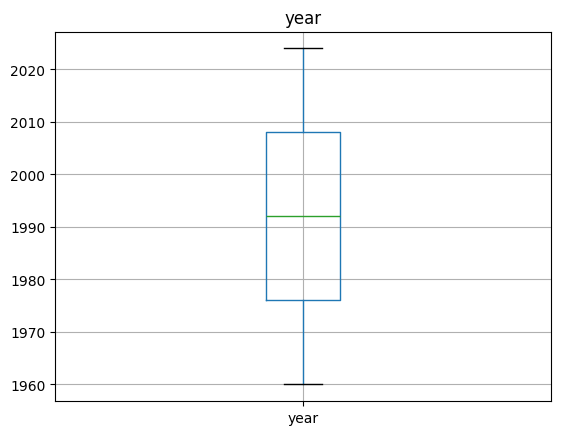

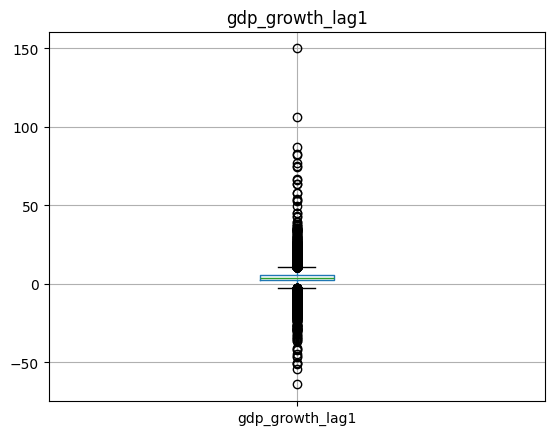

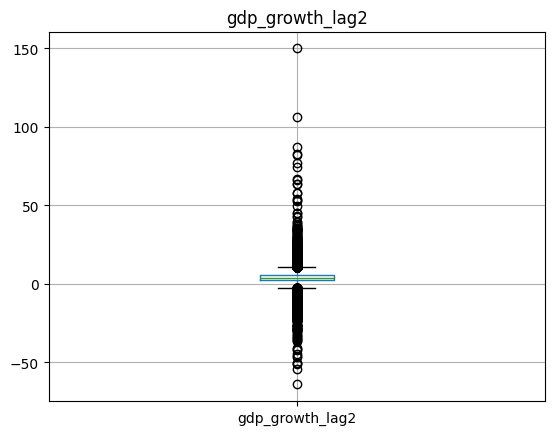

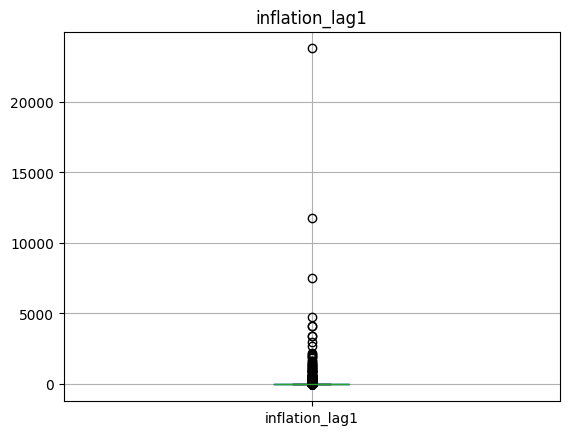

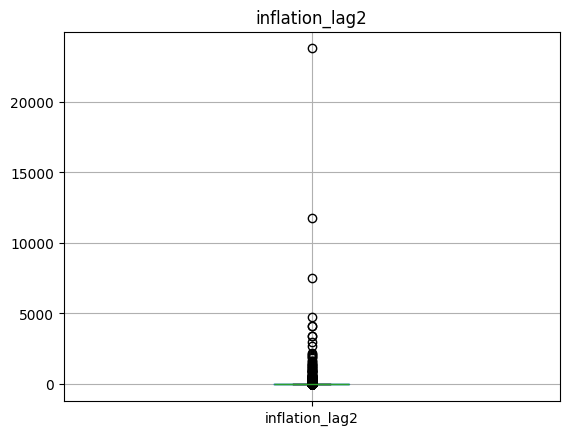

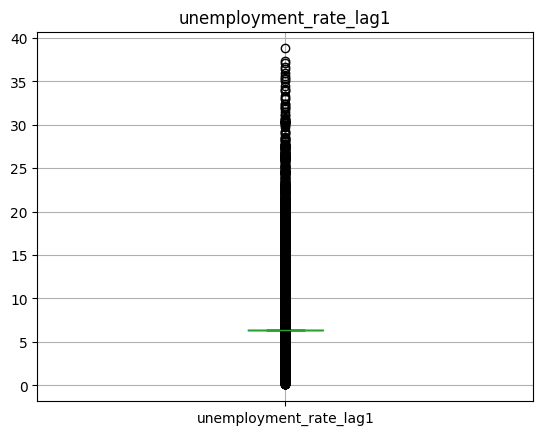

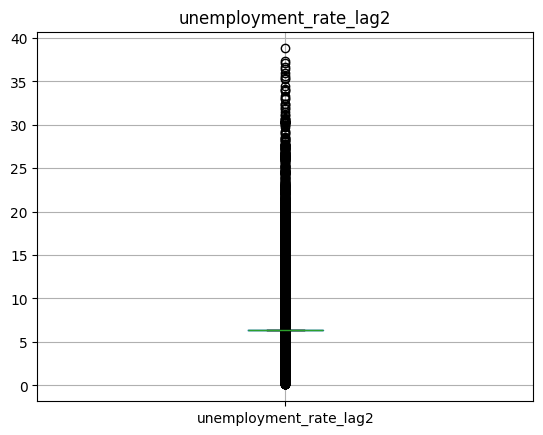

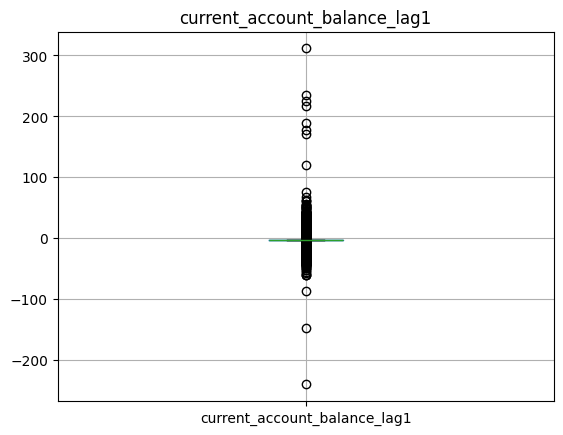

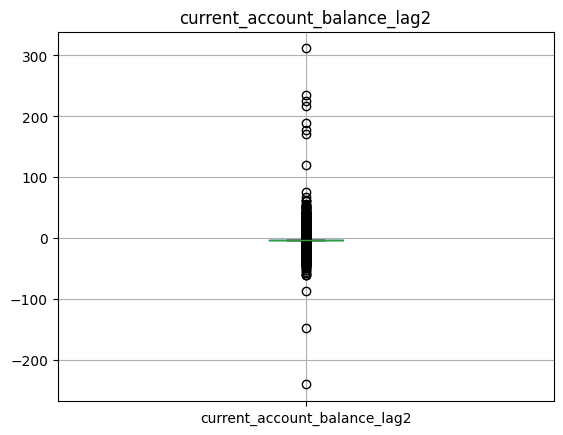

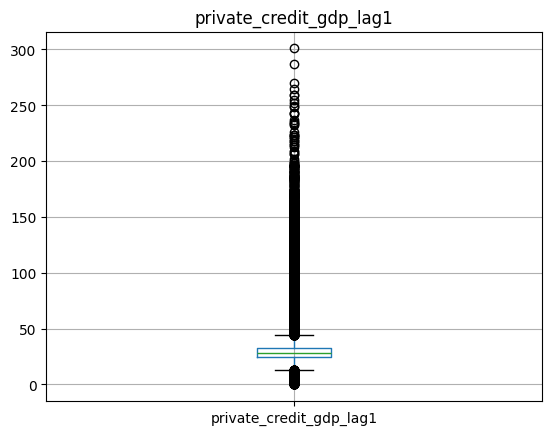

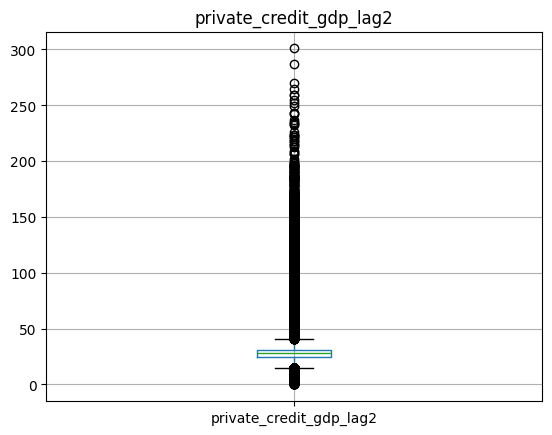

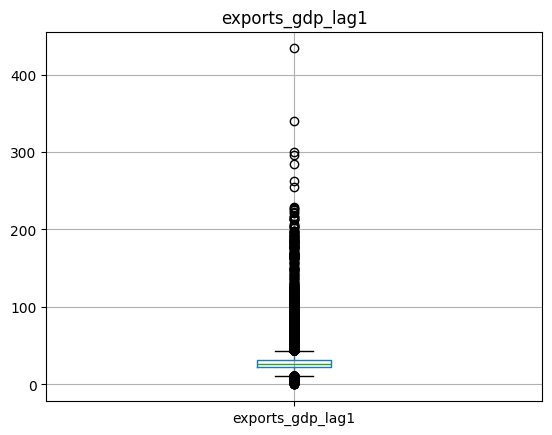

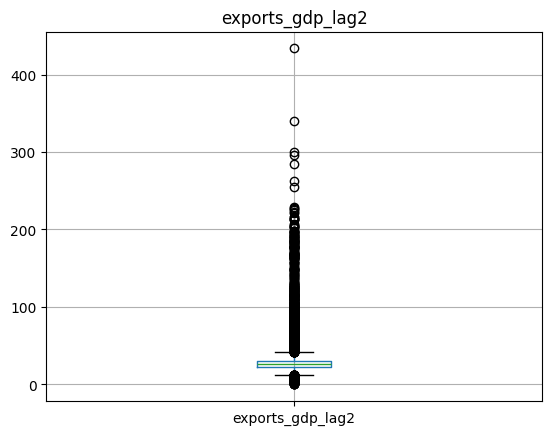

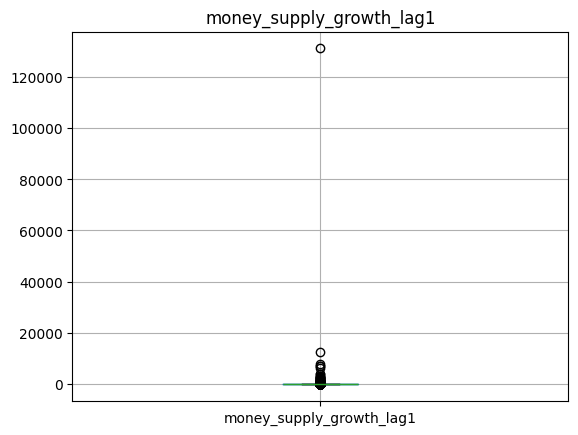

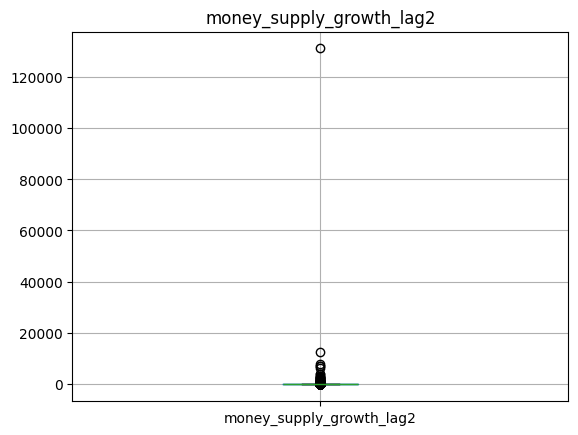

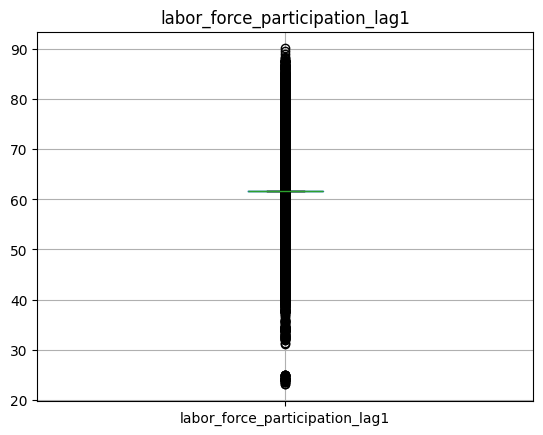

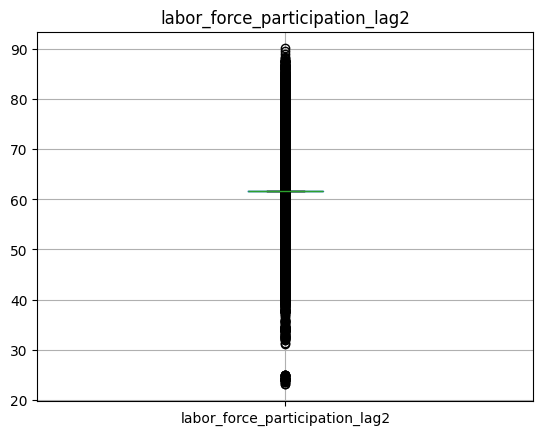

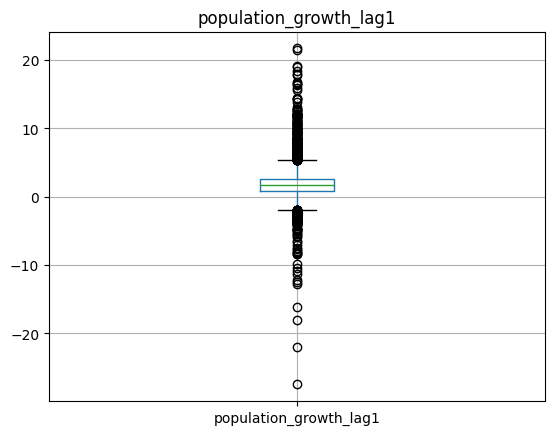

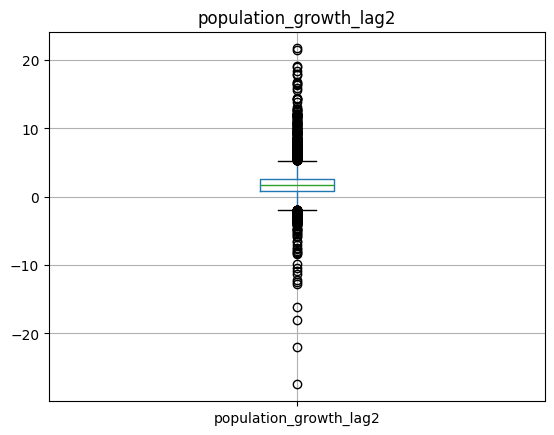

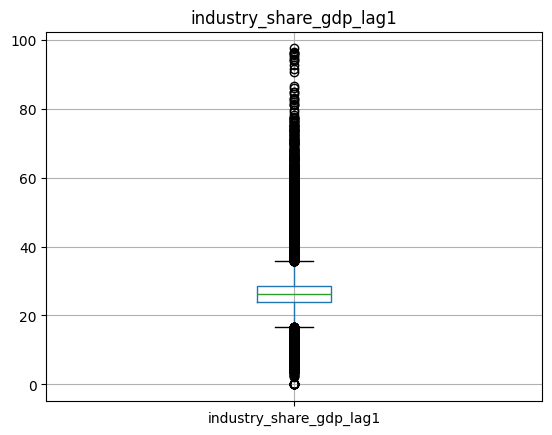

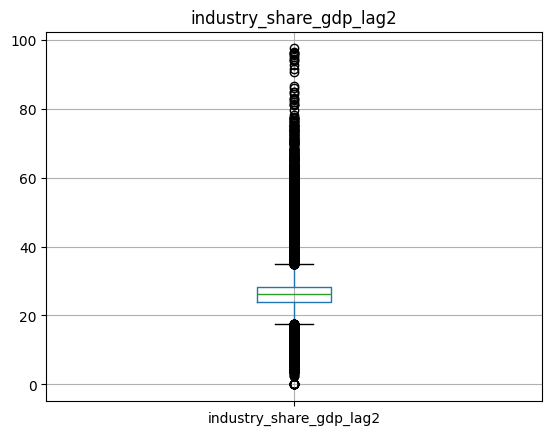

In [55]:
for col in num_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(col)
    plt.show()


In [56]:
target_col = 'slowdown_score'
year_col = 'year'   # adjust if your column name is different

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop([target_col, year_col], errors='ignore')


In [57]:
def iqr_capping(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    
    return series.clip(lower, upper)


In [58]:
df[num_cols] = df[num_cols].apply(iqr_capping)


“Macroeconomic variables naturally exhibit extreme values during economic shocks and regime transitions.
Rather than removing these observations, I applied IQR-based capping to limit their disproportionate influence on linear models while preserving all data points.
This ensures numerical stability without discarding economically meaningful events.”

In [107]:
df.to_csv("macro_data.csv", index=False)

#### Defining X and y

In [60]:
target_col

'slowdown_score'

In [61]:
threshold = df['slowdown_score'].median()
y_class = (df['slowdown_score'] >= threshold).astype(int)

In [62]:
y_class = (df['slowdown_score'] >= threshold).astype(int)

In [63]:
y_class.value_counts()
y_class.value_counts(normalize=True)


slowdown_score
1    0.500029
0    0.499971
Name: proportion, dtype: float64

In [64]:
X=df.drop(columns=[target_col])
y=y_class

In [65]:
df.shape

(17295, 23)

#### Splitting 

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [68]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', CountEncoder())
])

In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

#### Baseline model

In [70]:
from sklearn.linear_model import LogisticRegression

baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        solver='lbfgs'
    ))
])

In [71]:
baseline_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [72]:
y_test_pred  = baseline_model.predict(X_test)
y_test_proba = baseline_model.predict_proba(X_test)[:, 1]


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6669    0.6896    0.6781      1727
           1     0.6796    0.6565    0.6678      1732

    accuracy                         0.6730      3459
   macro avg     0.6732    0.6731    0.6729      3459
weighted avg     0.6732    0.6730    0.6729      3459



In [74]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_test_proba)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.7110415878233357


In [75]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6730268863833477


#### Random forest

In [76]:
num_pipeline_tree = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [77]:

cat_pipeline_tree = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', CountEncoder())
])

In [78]:
from sklearn.compose import ColumnTransformer

preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', num_pipeline_tree, num_cols),
        ('cat', cat_pipeline_tree, cat_cols)
    ]
)


In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])


In [80]:
rf_param_grid = {
    'classifier__n_estimators': [300,500,800],
    'classifier__max_depth': [None,1, 10,15, 20],
    'classifier__min_samples_leaf': [1, 5, 3],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features': ['sqrt',0.3, 0.5]
}


In [81]:
'''from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)
'''

"from sklearn.model_selection import GridSearchCV\n\nrf_grid = GridSearchCV(\n    estimator=rf_pipeline,\n    param_grid=rf_param_grid,\n    scoring='roc_auc',\n    cv=3,\n    n_jobs=-1,\n    verbose=2\n)\n"

In [82]:
rf_param_dist = {
    'classifier__n_estimators': [300, 500, 800],
    'classifier__max_depth': [10, 15, 20, None],
    'classifier__min_samples_leaf': [1, 3, 5],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features': ['sqrt', 0.3, 0.5]
}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

rf_random_acc = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_dist,
    n_iter=20,                 # enough for RF
    scoring='accuracy',        # accuracy focus
    cv=3,                      # faster
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rf_random_acc.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'classifier__max_depth': [10, 15, ...], 'classifier__max_features': ['sqrt', 0.3, ...], 'classifier__min_samples_leaf': [1, 3, ...], 'classifier__min_samples_split': [2, 5, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the var

In [84]:
'''rf_grid.fit(X_train, y_train)'''


'rf_grid.fit(X_train, y_train)'

In [85]:
y_pred_rf=rf_random_acc.predict(X_test)
y_proba_rf=rf_random_acc.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_test_proba)
print('roc: ',roc_auc)
print("Accuracy:",accuracy)

roc:  0.7110415878233357
Accuracy: 0.7643827695865857


#### XGBoost

In [86]:
from xgboost import XGBClassifier


In [87]:

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])


In [88]:
xgb_param_grid = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [4, 6],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}


In [89]:
from sklearn.model_selection import GridSearchCV

xgb_grid = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=xgb_param_grid,
    scoring='accuracy',   # 🎯 accuracy focus
    cv=3,                 # faster than 5
    n_jobs=-1,
    verbose=2
)


In [90]:
xgb_grid.fit(X_train, y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__colsample_bytree': [0.8, 1.0], 'classifier__learning_rate': [0.05, 0.1], 'classifier__max_depth': [4, 6], 'classifier__n_estimators': [200, 300], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 :

In [91]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred_xgb  = xgb_grid.predict(X_test)
y_proba_xgb = xgb_grid.predict_proba(X_test)[:, 1]

print("XGB Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGB ROC-AUC :", roc_auc_score(y_test, y_proba_xgb))


XGB Accuracy: 0.7551315409077768
XGB ROC-AUC : 0.832607807529109


#### Gradient Boost

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('classifier', GradientBoostingClassifier(
        random_state=42
    ))
])

In [93]:
gb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__min_samples_leaf': [5, 10]
}


In [94]:
from sklearn.model_selection import GridSearchCV

gb_grid = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid,
    scoring='accuracy',   # 🎯 accuracy focus
    cv=3,
    n_jobs=-1,
    verbose=2
)


In [95]:
gb_grid.fit(X_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__learning_rate': [0.05, 0.1], 'classifier__max_depth': [3, 5], 'classifier__min_samples_leaf': [5, 10], 'classifier__n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the compu

In [96]:
best_gb = gb_grid.best_estimator_
y_pred_gb  = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]

print("Best GB params:")
print(gb_grid.best_params_)

print("GB Accuracy:", accuracy_score(y_test, y_pred_gb))
print("GB ROC-AUC :", roc_auc_score(y_test, y_proba_gb))

Best GB params:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 100}
GB Accuracy: 0.7554206418039896
GB ROC-AUC : 0.8336154420152154


In [97]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)

def evaluate_model(model, X_test, y_test, model_name):
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        'Model': model_name,
        'Accuracy (%)': round(accuracy_score(y_test, y_pred) * 100, 2),
        'ROC-AUC': round(roc_auc_score(y_test, y_proba), 3),
        'Precision (Slowdown)': round(precision_score(y_test, y_pred), 3),
        'Recall (Slowdown)': round(recall_score(y_test, y_pred), 3),
        'F1-score (Slowdown)': round(f1_score(y_test, y_pred), 3)
    }


In [98]:
results = []

results.append(evaluate_model(baseline_model, X_test, y_test, 'Logistic Regression'))
results.append(evaluate_model(rf_random_acc, X_test, y_test, 'Random Forest'))
results.append(evaluate_model(best_gb, X_test, y_test, 'Gradient Boosting'))
results.append(evaluate_model(xgb_grid, X_test, y_test, 'XGBoost'))


In [99]:
results_df = pd.DataFrame(results)

# Sort by primary metric (ROC-AUC)
results_df = results_df.sort_values(by='ROC-AUC', ascending=False)

results_df


,Model,Accuracy (%),ROC-AUC,Precision (Slowdown),Recall (Slowdown),F1-score (Slowdown)
1,Random Forest,76.44,0.844,0.724,0.857,0.785
2,Gradient Boosting,75.54,0.834,0.710,0.865,0.780
3,XGBoost,75.51,0.833,0.708,0.870,0.781
0,Logistic Regression,67.30,0.711,0.680,0.656,0.668


Among the evaluated models, Random Forest achieved the highest ROC-AUC (0.844), accuracy (76.44%), and F1-score, indicating superior discriminative ability and balanced performance. Therefore, Random Forest was selected as the final model for predicting the probability of economic slowdown.

In [100]:
df.columns

Index(['year', 'country_code', 'gdp_growth_lag1', 'gdp_growth_lag2',
       'inflation_lag1', 'inflation_lag2', 'unemployment_rate_lag1',
       'unemployment_rate_lag2', 'current_account_balance_lag1',
       'current_account_balance_lag2', 'private_credit_gdp_lag1',
       'private_credit_gdp_lag2', 'exports_gdp_lag1', 'exports_gdp_lag2',
       'money_supply_growth_lag1', 'money_supply_growth_lag2',
       'labor_force_participation_lag1', 'labor_force_participation_lag2',
       'population_growth_lag1', 'population_growth_lag2',
       'industry_share_gdp_lag1', 'industry_share_gdp_lag2', 'slowdown_score'],
      dtype='object')

In [101]:
final_model = rf_random_acc.best_estimator_

In [102]:
import joblib

joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

#### OUTPUT:

In [103]:
'''new_input = {
    'year': 2022,
    'country_code': 'IND',

    'gdp_growth_lag1': 6.8,
    'gdp_growth_lag2': 7.2,

    'inflation_lag1': 5.9,
    'inflation_lag2': 6.3,

    'unemployment_rate_lag1': 4.4,
    'unemployment_rate_lag2': 4.8,

    'current_account_balance_lag1': -1.2,
    'current_account_balance_lag2': -0.8,

    'private_credit_gdp_lag1': 54.3,
    'private_credit_gdp_lag2': 53.9,

    'exports_gdp_lag1': 19.5,
    'exports_gdp_lag2': 20.1,

    'money_supply_growth_lag1': 9.2,
    'money_supply_growth_lag2': 8.7,

    'labor_force_participation_lag1': 49.8,
    'labor_force_participation_lag2': 50.1,

    'population_growth_lag1': 0.9,
    'population_growth_lag2': 1.0,

    'industry_share_gdp_lag1': 27.4,
    'industry_share_gdp_lag2': 27.9
}

new_input = pd.DataFrame([new_input])'''

"new_input = {\n    'year': 2022,\n    'country_code': 'IND',\n\n    'gdp_growth_lag1': 6.8,\n    'gdp_growth_lag2': 7.2,\n\n    'inflation_lag1': 5.9,\n    'inflation_lag2': 6.3,\n\n    'unemployment_rate_lag1': 4.4,\n    'unemployment_rate_lag2': 4.8,\n\n    'current_account_balance_lag1': -1.2,\n    'current_account_balance_lag2': -0.8,\n\n    'private_credit_gdp_lag1': 54.3,\n    'private_credit_gdp_lag2': 53.9,\n\n    'exports_gdp_lag1': 19.5,\n    'exports_gdp_lag2': 20.1,\n\n    'money_supply_growth_lag1': 9.2,\n    'money_supply_growth_lag2': 8.7,\n\n    'labor_force_participation_lag1': 49.8,\n    'labor_force_participation_lag2': 50.1,\n\n    'population_growth_lag1': 0.9,\n    'population_growth_lag2': 1.0,\n\n    'industry_share_gdp_lag1': 27.4,\n    'industry_share_gdp_lag2': 27.9\n}\n\nnew_input = pd.DataFrame([new_input])"

In [104]:
new_input = X_test.iloc[[500]].copy()

# new_input must be a DataFrame with same columns as X_train
prob_slowdown = final_model.predict_proba(new_input)[0, 1]

slowdown_percentage = round(prob_slowdown * 100, 2)
def slowdown_risk_band(prob):
    if prob < 0.30:
        return "Low risk (stable economic outlook)"
    elif prob < 0.50:
        return "Moderate risk"
    elif prob < 0.70:
        return "High risk"
    else:
        return "Very high risk (strong slowdown signals)"
def predict_slowdown_output(model, input_data):
    prob = model.predict_proba(input_data)[0, 1]
    
    return {
        "slowdown_probability_percent": round(prob * 100, 2),
        "risk_category": slowdown_risk_band(prob)
    }
output = predict_slowdown_output(final_model, new_input)
data=pd.DataFrame(new_input)
data


,year,country_code,gdp_growth_lag1,gdp_growth_lag2,inflation_lag1,inflation_lag2,unemployment_rate_lag1,unemployment_rate_lag2,current_account_balance_lag1,current_account_balance_lag2,...,exports_gdp_lag1,exports_gdp_lag2,money_supply_growth_lag1,money_supply_growth_lag2,labor_force_participation_lag1,labor_force_participation_lag2,population_growth_lag1,population_growth_lag2,industry_share_gdp_lag1,industry_share_gdp_lag2
14314,1974,SUR,-1.8,-0.6,11.00868,3.234287,6.346,6.394206,-2.808268,-2.856221,...,26.563627,26.457494,13.346662,13.442628,61.66,61.6505,-0.413775,1.388769,35.804337,34.947464


In [105]:
print(f"Probability of economic slowdown (next 6 months): {output['slowdown_probability_percent']}%")
print(f"Risk assessment: {output['risk_category']}")


Probability of economic slowdown (next 6 months): 82.19%
Risk assessment: Very high risk (strong slowdown signals)


#### CONCLUSION

- Developed an Economic Slowdown Early Warning System using historical macroeconomic data.
- Incorporated lag features to capture temporal dependencies and avoid data leakage.
- Designed a continuous slowdown score to measure the intensity of economic slowdown rather than a binary outcome.
- Demonstrated that machine learning models can provide meaningful early signals of economic regime changes.